In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [81]:
def wczytajDane(nazwa):
    plik = open(nazwa, 'r')
    linie = plik.readlines()
    plik.close()
    dane = []
    for linia in linie:
        linia = linia.split('\n')[0]
        linia = linia.split(',')
        nowalinia = []
        for i in linia:
            nowalinia.append(float(i))
        dane.append(nowalinia)
    return dane
        
dane1 = wczytajDane('data1.csv')
dane2 = wczytajDane('data2.csv')
dane3 = wczytajDane('data3.csv')
dane4 = wczytajDane('data4.csv')

In [121]:
def kowariancja(x,y):
    średnia_x = np.mean(x)
    średnia_y = np.mean(y)
    pomoc = (x - średnia_x)*(y - średnia_y)
    return np.mean(pomoc)

def wariancja(x):
    return kowariancja(x,x)

def macierzX(x_1, x_2):
    return np.matrix([np.full(len(x_1), 1), x_1, x_2]).transpose()

def macierzY(y):
    return np.matrix([y]).transpose()

def ocena(y, y_oczek):
    err = y - y_oczek
    return 1  - wariancja(err)/wariancja(y)

def błąd(y, y_oczek):
    return np.mean((y_oczek - y)**2)

def maksOd(y_oczek):
    res = wariancja(y_oczek) ** 0.5
    return np.amax(res)

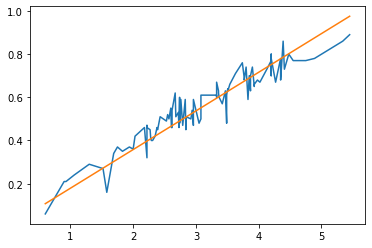

<Figure size 1600x800 with 0 Axes>

Błąd:  0.003088987799646239
Maksymalne odchylenie:  0.1738787671216956
Ocena R**2:  0.8827351122800478


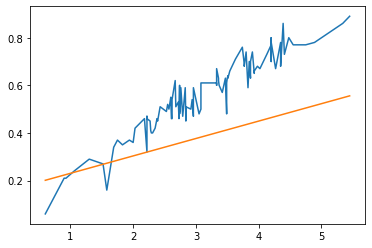

<Figure size 1600x800 with 0 Axes>

Błąd:  0.039667149884758036
Maksymalne odchylenie:  0.07102991501182039
Ocena R**2:  0.64196391803339


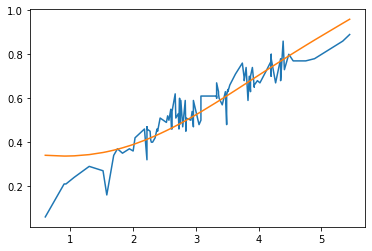

<Figure size 1600x800 with 0 Axes>

Błąd:  0.00437849757339118
Maksymalne odchylenie:  0.14692005454194737
Ocena R**2:  0.8313627494457256


In [122]:
#Dane1 i Dane2

def parametry1(x,y):
    c = x * y
    return np.mean(c)/np.mean(x**2)

def parametry2(x, y):
    a = kowariancja(x,y)/wariancja(x)
    b = np.mean(y) - a * np.mean(x)
    return a,b

def macierzA3(x,y):
    X = macierzX(x**2, np.sin(x))
    Y = macierzY(y)
    res = np.matmul(X.transpose(), X)
    res = np.linalg.inv(res)
    res = np.matmul(res, X.transpose())
    res = np.matmul(res, Y)
    return res.item(0), res.item(1), res.item(2)

def wykresOneParam(x, y, y_oczek, krok):
    plt.plot(x, y)
    plt.plot(x, y_oczek)
    plt.figure(figsize=(20, 10), dpi=80)
    plt.show()

def programOneParam(x, y, y_oczek):
    wykresOneParam(x, y, y_oczek, 0.1)
    print("Błąd: ", błąd(y, y_oczek))
    print("Maksymalne odchylenie: ", maksOd(y_oczek))
    print("Ocena R**2: ", ocena(y, y_oczek))

x = np.array([x[0] for x in dane1])
y = np.array([x[1] for x in dane1])

a = parametry1(x, y)
y_oczek = a * x
programOneParam(x, y, y_oczek)

a,b = parametry2(x, y)
y_oczek = b * x + a
programOneParam(x, y, y_oczek)

a,b,c = macierzA3(x, y)
y_oczek = a  + b * x**2 + c * np.sin(x)
programOneParam(x, y, y_oczek)

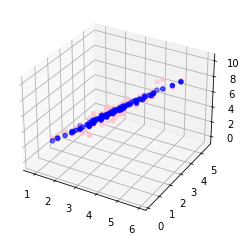

Błąd:  0.23705954337678278
Maksymalne odchylenie:  1.8757290040470131
Ocena R**2:  0.9368753384171703


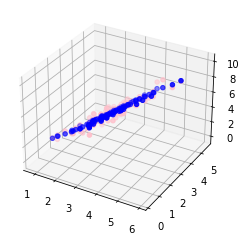

Błąd:  0.22936381845980713
Maksymalne odchylenie:  1.8777792792391805
Ocena R**2:  0.9389245705387665


In [125]:
x_1 = np.array([x[0] for x in dane3])
x_2 = np.array([x[1] for x in dane3])
y   = np.array([x[2] for x in dane3])

def macierzA4(x_1, x_2, y):
    X = macierzX(x_1,x_2)
    Y = macierzY(y)
    res = np.matmul(X.transpose(), X)
    res = np.linalg.inv(res)
    res = np.matmul(res, X.transpose())
    res = np.matmul(res, Y)
    return res.item(0), res.item(1), res.item(2)

def macierzX5(x_1, x_2, x_3,x_4,x_5):
    return np.matrix([np.full(len(x_1), 1), x_1, x_2, x_3,x_4, x_5]).transpose()

def macierzA5(x_1,x_2,y):
    X = macierzX5(x_1**2,x_1*x_2, x_2**2, x_1, x_2)
    Y = macierzY(y)
    res = np.matmul(X.transpose(), X)
    res = np.linalg.inv(res)
    res = np.matmul(res, X.transpose())
    res = np.matmul(res, Y)
    return res.item(0), res.item(1), res.item(2), res.item(3), res.item(4), res.item(5)

def wykresTwoParam(x_1,x_2,y, y_oczek):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(x_1, x_2, y, color="pink")
    ax.scatter(x_1, x_2, y_oczek, color="blue")
    plt.show()

def programTwoParam(x_1, x_2, y, y_oczek):
    wykresTwoParam(x_1, x_2, y, y_oczek)
    print("Błąd: ", błąd(y, y_oczek))
    print("Maksymalne odchylenie: ", maksOd(y_oczek))
    print("Ocena R**2: ", ocena(y, y_oczek))

a,b,c = macierzA4(x_1,x_2, y)
y_oczek = a + b * x_1 + c * x_2
programTwoParam(x_1, x_2, y, y_oczek)

a,b,c,d,e,f = macierzA5(x_1,x_2, y)
y_oczek = a + b * x_1**2 + c * x_1 * x_2 + d * x_2 ** 2 + e * x_1  + f * x_2
programTwoParam(x_1, x_2, y, y_oczek)
